In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,linspace,meshgrid,array

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (8,8),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('default')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


<p style="padding-bottom:40%;"> </p>

# One-minute Review

  - A double integral over a region $\mathcal D$ is a limit of Riemann sums 
  $$\iint_\mathcal{D} f(x,y)\,dA = \lim_{M,N\to \infty} \sum_{i=1}^M \sum_{j=1}^N f(x_{ij}^*,y_{ij}^*)\, \Delta A_{ij} $$

where $(x_{ij}^*,y_{ij}^*)$ is a sample point in the $ij$th subrectangle contained in $\mathcal{D}$ and $\Delta A_{ij}$ is the area of the $ij$th subrectangle (often $\Delta x\Delta y$).

  - Fubini's Theorem states that for a continuous $f$ on a rectangle $[a,b]\times[c,d]$, the double integral is equal to the iterated integral. 
  
  $$\iint_\mathcal D f dA = \int_a^b \int_c^d f(x,y)\, dy \,dx$$
  

  - Integrating in three dimensions presents no theoretical challenge. 

$$\iiint_E f(x,y,z)\,dV = \lim_{M,N,P\to\infty} \sum_{i=1}^M\sum_{j=1}^N\sum_{k=1}^P f(x_i^*,y_j^*,z_k^*)\,\Delta V_{ijk}$$

  - Fubini's Theorem applies directly to this case; thus, we can compute using (3) iterated integrals.

$$\iiint_E f(x,y,z)\,dV = \int_a^b \int_{g(x)}^{h(x)} \int_{j(x,y)}^{k(x,y)} f(x,y,z)\,dz\,dy\,dx $$

<p style="padding-bottom:40%;"> </p>

# Lecture 15 - Other coordinates

  - Objectives
    - Double Integration
      - Polar Coordinates
    - Triple Integration
      - Change order of integration for nonrectangular domains.
      - Cylindrical Coordinates.
      - Spherical Coordinates.    
  - Resources
    - Content
      - Stewart: §15.5–7
      - New Strang:  

        - [§5.3](https://openstax.org/books/calculus-volume-3/pages/5-3-double-integrals-in-polar-coordinates) [§5.5](https://openstax.org/books/calculus-volume-3/pages/5-5-triple-integrals-in-cylindrical-and-spherical-coordinates)
      - [3Demos](https://drew.youngren.nyc/3Demos/iiint/)

    - Practice
      - Mooculus: [Polar Coordinates](https://ximera.osu.edu/mooculus/calculus3/commonCoordinates/digInPolarCoordinates) - [Cylindrical Coordinates](https://ximera.osu.edu/mooculus/calculus3/commonCoordinates/digInCylindricalCoordinates) - [Spherical](https://ximera.osu.edu/mooculus/calculus3/computationsAndInterpretations/digInMassMomentsAndCenterOfMass)
    - Extras
      - CalcBLUE: [Polar](https://youtu.be/51v2UBsO6XY) - [Cylindrical Coordinates](https://www.youtube.com/watch?v=YIi7muLgI9U&list=PL8erL0pXF3JaJdUcmc_PeGV-vG5z87BkD&index=90) - [Spherical Coordinates](https://www.youtube.com/watch?v=Zc8uCT-e5KI&list=PL8erL0pXF3JaJdUcmc_PeGV-vG5z87BkD&index=98) 

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

## Switching the order of integration

This is not an easy task in 3 variables, but is a very good exercise in spacial reasoning.

It is worth practicing sketching in 3D (and keeping a graphing tool like CalcPlot3D handy). 

### Example

Write the triple integral $\iiint_E f(x,y,z)\,dV$ where E is the region in the first octant bounded by $z = 1-x^2$ and $y = 1-x$ as two different iterated integrals. 

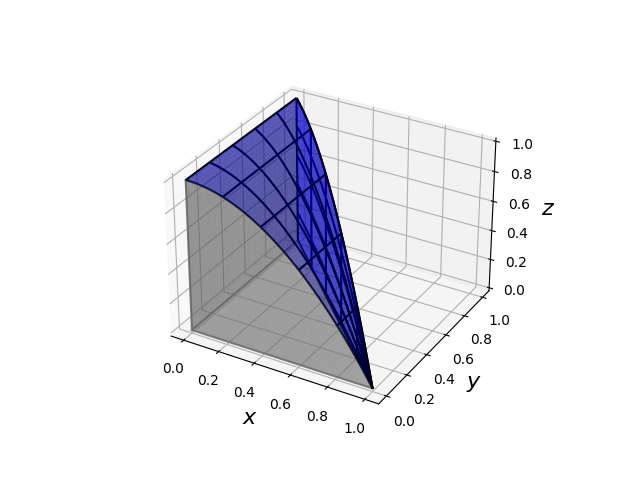

In [14]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([0,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[0,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[0,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    u = np.linspace(0,1,80)
    v = np.linspace(0,1,80)
    U,V = np.meshgrid(u,v)
    X = U
    Y = V*(1-U)
    Z = 1-X**2
    ax.plot_wireframe(X,Y,Z,rcount=5,ccount=5,color='k')
    ax.plot_surface(X,Y,Z, color='b', alpha=.5)
    # ax.plot_surface(X,Y,0*X,rcount=20,ccount=20,color='gray',alpha=.4)
    # ax.plot_surface(U,0*U,(1-U**2)*V,rcount=20,ccount=20,color='gray',alpha=.4)    
    ax.plot_wireframe(U,1-U,V*(1-U**2),rcount=5,ccount=5,color='k')
    ax.plot_surface(U,1-U,V*(1-U**2), color='b', alpha=.5)
    ax.plot_surface(X,Y,0*X,rcount=20,ccount=20,color='gray',alpha=.4)
    ax.plot_surface(U,0*U,(1-U**2)*V,rcount=20,ccount=20,color='gray',alpha=.4)
    ax.plot_surface(0*U,U,V,rcount=20,ccount=20,color='gray',alpha=.4)
    
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    return fig.canvas

a("A Triple Integral Example")

<p style="padding-bottom:40%;"> </p>

### Solutions

$$ \int_0^1\int_0^{1-x}\int_0^{1-x^2}f(x,y,z)\,dz\,dy\,dx$$

In [3]:
tplquad(lambda z,y,x: cos(y)  + sin(z),0,1,0,lambda x: 1 - x,0, lambda x,y: 1- x**2)

(0.5500302699425432, 1.6205777433387094e-14)

$$ \int_0^1\int_0^{1-x^2}\int_0^{1-x}f(x,y,z)\,dy\,dz\,dx$$

In [4]:
tplquad(lambda y,z,x: cos(y) + sin(z),0,1,0,lambda x: 1 - x**2,0, lambda x,z: 1- x)

(0.5500302699425432, 1.8638028677838668e-14)

#### The hard way

$$ \int_0^1\int_0^{1-(1-y)^2}\int_0^{1-y}f(x,y,z)\,dx\,dz\,dy$$
$$ + \int_0^1\int_{1-(1-y)^2}^1\int_0^{\sqrt{1-z}}f(x,y,z)\,dx\,dz\,dy$$

In [5]:
tplquad(lambda x,z,y: cos(y) + sin(z),0,1,0,lambda y: 1 - (1-y)**2,0, lambda y,z: 1 - y)[0] + \
tplquad(lambda x,z,y: cos(y) + sin(z),0,1,lambda y: 1 - (1-y)**2,1,0, lambda y,z: sqrt(1-z))[0]

0.5500302699434154

###
<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

## Polar Coordinates

A point in $\mathbb{R}^2$ can be described in _rectangular_ coordinates $(x,y)$ with $-\infty < x < \infty ,-\infty < y < \infty$ or _polar_ coordinates $(r, \theta)$ with $0 \leq r < \infty, 0 \leq \theta <2\pi$.

\begin{align*}
 x &= r \cos \theta \\
 y &= r \sin \theta 
\end{align*}



In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(6,6))
    plt.ion()
    
    sliderX = FloatSlider(min=-1, max=1, step=.01, value=.5)
    sliderY = FloatSlider(min=-1, max=1, step=.01, value=.5)
    x,y = sliderX.value, sliderY.value
    
    sc = ax.scatter([x], [y], c='k')
    r = sqrt(x**2 + y**2)
    th = np.angle(x + 1j*y)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    px = ax.plot([0,x],[0,0],label=r"$x$")
    py = ax.plot([x,x],[0,y],label=r"$y$")
    t = linspace(0,1,100)
    
#     plt.plot([-1,1],[0,0],'gray',lw=1, zorder=-1)
#     plt.plot([0,0],[-1,1],'gray',lw=1, zorder=-1)

    pr = ax.plot([0,x],[0,y],label=r"$r$")
    pt = ax.plot(r/4*cos(th*t),r/4*sin(th*t),'--',label=r"$\theta$")
    
    ax.legend()
    ax.grid()
    
    def update(change):
        x,y = sliderX.value, sliderY.value

        ax.collections.pop()
        sc = ax.scatter([x], [y], c='k')
        r = sqrt(x**2 + y**2)
        th = np.angle(x + 1j*y)
        px[0].set_data([0,x],[0,0])
        py[0].set_data([x,x],[0,y])
        pr[0].set_data([0,x],[0,y])
        pt[0].set_data(r/4*cos(th*t),r/4*sin(th*t))
    
    sliderX.observe(update, names='value')
    sliderY.observe(update, names='value')
    
    return VBox([HBox([sliderX, sliderY]), fig.canvas])

a("Polar Coordinates")

<p style="padding-bottom:40%;"> </p>

### Areas

Note that the area of the rectangle $\{(x,y) \mid x_1 \leq x \leq x_2, y_1 \leq y \leq y_2 \}$ is 

$$\Delta A = (x_2-x_1)(y_2-y_1) = \Delta x \Delta y $$

But what about a "polar rectangle"  $\{(r \cos \theta,r \sin \theta) \mid r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 \}$?

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(10,5))
    plt.ion()
    
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    s = slider.value

    ax= fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')

    r = np.linspace(1,2,8)
    th = np.linspace(0,pi/3,8)
    t = np.linspace(0,1,26)
    
    px1 = {}
    py1 = {}
    px2 = {}
    py2 = {}
    
    for x in r:
        px1[x] = ax.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),'g')
    for y in th:
        py1[y] = ax.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),'g')

    for x in r:
        px2[x] = ax2.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),0*t,'g')
    for y in th:
        py2[y] = ax2.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),0*t,'g')
        
    pv = [ax2.plot([1,1], [0,0], [0,2],color='g'),
          ax2.plot([2,2], [0,0], [0,3],color='g'),
          ax2.plot([(1-s)*1 + s*cos(pi/3),(1-s)*1 + s*cos(pi/3)],
                   [(1-s)*pi/3 + s*sin(pi/3),(1-s)*pi/3 + s*sin(pi/3)], 
                   [0, 1 + 1/2 + sqrt(3)/2], color='g'),
         ax2.plot([(1-s)*2 + s*2*cos(pi/3),(1-s)*2*1 + s*2*cos(pi/3)],
                   [(1-s)*pi/3 + s*2*sin(pi/3),(1-s)*pi/3 + s*2*sin(pi/3)], 
                   [0, 1 + 2*1/2 + 2*sqrt(3)/2], color='g')]
        
    for a in [ax,ax2]:
        if s == 0:
            a.set_xlabel('$r$',fontsize=20)
            a.set_ylabel('$\\theta$',fontsize=20)
        elif s == 1:
            a.set_xlabel('$x$',fontsize=20)
            a.set_ylabel('$y$',fontsize=20)
        else:
            a.set_xlabel(' ',fontsize=20)
            a.set_ylabel(' ',fontsize=20)
            
    R,TH = np.meshgrid(r,th)
    
    X = (1-s)*R + s*(R*cos(TH))
    Y = (1-s)*TH + s*(R*sin(TH))
    Z = 1 + R*cos(TH) + R*sin(TH)
    ax2.plot_surface(X,Y,Z,cmap='rainbow')
   
    ax.set_xlim([0,2.5])
    ax.set_ylim([0,2.5])
    ax2.set_xlim3d([0,2.5])
    ax2.set_ylim3d([0,2.5])
    
    def update(change):
        s = slider.value
        for x in r:
            px1[x][0].set_data((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)))
        for y in th:
            py1[y][0].set_data((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y))

        for x in r:
            px2[x][0].set_data_3d((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),0*t)
        for y in th:
            py2[y][0].set_data_3d((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),0*t)

        pv[2][0].set_data_3d([(1-s)*1 + s*cos(pi/3),(1-s)*1 + s*cos(pi/3)],
                   [(1-s)*pi/3 + s*sin(pi/3),(1-s)*pi/3 + s*sin(pi/3)], 
                   [0, 1 + 1/2 + sqrt(3)/2])
        pv[3][0].set_data_3d([(1-s)*2 + s*2*cos(pi/3),(1-s)*2*1 + s*2*cos(pi/3)],
                   [(1-s)*pi/3 + s*2*sin(pi/3),(1-s)*pi/3 + s*2*sin(pi/3)], 
                   [0, 1 + 2*1/2 + 2*sqrt(3)/2])
        ax2.collections.pop()
        
        X = (1-s)*R + s*(R*cos(TH))
        Y = (1-s)*TH + s*(R*sin(TH))
        Z = 1 + R*cos(TH) + R*sin(TH)
        ax2.plot_surface(X,Y,Z,cmap='rainbow')
        
        for a in [ax,ax2]:
            if s == 0:
                a.set_xlabel('$r$',fontsize=20)
                a.set_ylabel('$\\theta$',fontsize=20)
            elif s == 1:
                a.set_xlabel('$x$',fontsize=20)
                a.set_ylabel('$y$',fontsize=20)
            else:
                a.set_xlabel(' ',fontsize=20)
                a.set_ylabel(' ',fontsize=20)
            
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Areas in Polar")

<p style="padding-bottom:40%;"> </p>

## Converting integrals to polar coordinates. 

Let $\mathcal{D}$ be the polar region defined by $r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 $ and $f(x,y)$ a continuous function on $\mathcal D$. Then,

$$\iint_\mathcal D f dA = \int_{\theta_1}^{\theta_2} \int_{r_1}^{r_2} f(r \cos \theta,r \sin \theta )\,r\,dr\,d\theta$$ 



Remember to convert all parts of the integral:
  - **Where?** the limits of integration 
  - **What?** the integrand 
  - **How?** the differential

<p style="padding-bottom:40%;"> </p>

## Example

  1. Find the volume under a paraboloid $z=a^2-x^2-y^2$ and above $z=0$ in terms of $a$ where $a>0$.
  

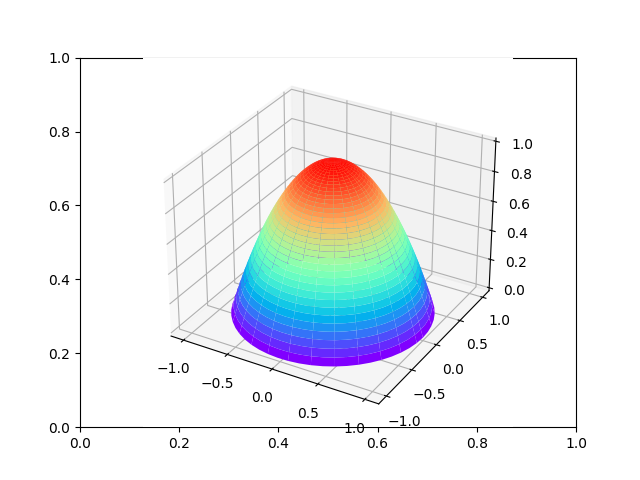

In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    r = np.linspace(0,1,40)
    th = np.linspace(0,2*pi,56)
    r,th = np.meshgrid(r,th)
    X = r*cos(th)
    Y = r*sin(th)
    Z = 1 - r**2
    ax.plot_surface(X,Y,Z,cmap='rainbow');

    return fig.canvas

a("A polar integral")




<p style="padding-bottom:40%;"> </p>

### Cool Example

Compute $$\int_{-\infty}^\infty e^{-x^2}\,dx.$$

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection="3d")
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(0,2)
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    t = slider.value

    r = linspace(0,3,300)
    th = linspace(0,pi*t,100)
    ax.plot(r,0*r,exp(-r**2), 'b')
    ax.plot(-r,0*r,exp(-r**2), 'b')

    r,th = meshgrid(linspace(0,3,300),th)
    ax.plot_surface(r*cos(th), r*sin(th), exp(-r**2), color='b', alpha=.8)
    ax.plot_surface(-r*cos(th), -r*sin(th), exp(-r**2), color='b', alpha=.8)
    ax.plot_wireframe(-r*cos(th), -r*sin(th), exp(-r**2), rstride=40, cstride=40, color='k', alpha=1)
    ax.plot_wireframe(r*cos(th), r*sin(th), exp(-r**2), rstride=40, cstride=40, color='k', alpha=1)

    ax.view_init(t*30, 90 - t*45)
    ax.set_xlabel("$x$", fontsize=18)
    ax.set_ylabel("$y$", fontsize=18)
    ax.set_zlabel("$z$", fontsize=18)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    
    def update(change):
        t = slider.value
        th = linspace(0,pi*t,100)
        r,th = meshgrid(linspace(0,3,300),th)

        while ax.collections:
            ax.collections.pop()
            
        ax.plot_surface(r*cos(th), r*sin(th), exp(-r**2), color='b', alpha=.8)
        ax.plot_surface(-r*cos(th), -r*sin(th), exp(-r**2), color='b', alpha=.8)
        ax.plot_wireframe(-r*cos(th), -r*sin(th), exp(-r**2), rstride=40, cstride=40, color='k', alpha=1)
        ax.plot_wireframe(r*cos(th), r*sin(th), exp(-r**2), rstride=40, cstride=40, color='k', alpha=1)


        ax.view_init(t*30, 90 - t*45)
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A cool example")

<p style="padding-bottom:40%;"> </p>

# Other Coordinates

In [10]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=[6,6])
    plt.ion()
    
    drop = Dropdown(options=['rectangular','cylindrical','spherical'], description="coords")
    coords = drop.value
    a,b,c = (.5,.6,.8)
    r = sqrt(a**2 + b**2)
    th = np.arctan(b/a)
    rho = sqrt(a**2 + b**2 + c**2)
    phi = np.arctan(r/c)
    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(0,1,80)
    v = np.linspace(0,1,80)
    U,V = np.meshgrid(u,v)
    X = U
    Y = V
    Z = np.ones_like(U)

    
    def update(change):
        coords = drop.value
        ax.clear()
        if coords=='rectangular':
            ax.plot([0,a,a,a],[0,0,b,b],[0,0,0,c],lw=3)
            ax.plot_surface(a*U,b*V,0*X,rcount=20,ccount=20,color='gray',alpha=.4)
        elif coords=='cylindrical':
            ax.plot([0,a,a],[0,b,b],[0,0,c],lw=3)
            ax.plot_surface(r*U*cos(th*V),r*U*sin(th*V),0*X,rcount=20,ccount=20,color='gray',alpha=.4)
            ax.plot(r/4*cos(th*u),r/4*sin(th*u),0,color='k')
            ax.text(r/3*cos(th/2),r/3*sin(th/2),0,"$\\theta$",horizontalalignment='center',verticalalignment='center',fontsize=16)
            ax.text(r/2*cos(th + .1),r/2*sin(th + .1),0,"$r$",horizontalalignment='center',verticalalignment='center',fontsize=16)
        elif coords=='spherical':
            ax.plot([0,a],[0,b],[0,c],lw=3)
            ax.plot_surface(r*U*cos(th*V),r*U*sin(th*V),0*X,rcount=20,ccount=20,color='gray',alpha=.4)
            ax.plot_surface(rho*U*cos(th)*sin(V*phi),rho*U*sin(th)*sin(V*phi),rho*U*cos(V*phi),rcount=20,ccount=20,color='gray',alpha=.4)
            ax.plot(r/4*cos(th*u),r/4*sin(th*u),0,color='k')
            ax.text(r/3*cos(th/2),r/3*sin(th/2),0,"$\\theta$",horizontalalignment='center',verticalalignment='center',fontsize=16)
            ax.text(rho/2*cos(th)*sin(phi - .1),rho/2*sin(th)*sin(phi - .1),rho/2*cos(phi - .1),"$\\rho$",horizontalalignment='center',verticalalignment='center',fontsize=16)
    #         ax.text(r/2*cos(th + .1),r/2*sin(th + .1),0,"$r$",horizontalalignment='center',verticalalignment='center',fontsize=16)
            ax.plot(r/4*cos(th)*sin(phi*u),r/4*sin(th)*sin(phi*u),r/4*cos(phi*u),color='k')
            ax.text(r/3*cos(th)*sin(phi/2),r/3*sin(th)*sin(phi/2),r/3*cos(phi/2),"$\\phi$",horizontalalignment='center',verticalalignment='center',fontsize=16)

        for ch in 'xyz':
            getattr(ax,f"set_{ch}lim")([0,1]);    
            getattr(ax,f"set_{ch}label")(f"${ch}$",size=16)
            
            
    update({})
    
    drop.observe(update, names='value')
    
    return VBox([drop, fig.canvas])

a("Coordinate Systems")

  - Rectangular: $$(x,y,z)$$
  - Cylindrical: $$(r,\theta,z)$$ $r\geq 0$, $0 \leq \theta \leq 2\pi$.
 
 - Spherical: $$(\rho,\theta,\phi)$$ $\rho\geq 0$, $0 \leq \theta \leq 2\pi$, $0 \leq \phi \leq \pi$.


\begin{align*} &\ 
 x &= r \cos \theta = \rho \sin \phi \cos \theta   \\
 y &= r \sin \theta = \rho \sin \phi \sin \theta   \\
 z &= z = \rho \cos(\phi)   
 \end{align*}
 
 

<p style="padding-bottom:40%;"> </p>

# Volumes

When integrating, we divide space up by taking small intervals in each coordinate. Let's look at the volumes $\Delta V$ of such subdivisions.

In [11]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=[6,6])
    plt.ion()
    
    slider = FloatSlider(min=0, max=1, step=.01)
    mov = slider.value
    drop = Dropdown(options=['rectangular','cylindrical','spherical'], description="coords")
    coords = drop.value

    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(0,1,81)
    v = np.linspace(0,1,81)
    U,V = np.meshgrid(u,v)
    X = U
    Y = V
    Z = np.ones_like(U)
    
    def update(change):
        coords = drop.value
        mov = slider.value
        ax.clear()
        if coords=='rectangular':
            ax.plot_wireframe(U,V,0*Z+mov,rcount=11,ccount=11,color='g',alpha=.7)
            ax.plot_wireframe(U,V,0*Z+mov-.1,rcount=11,ccount=11,color='g',alpha=.7)
            for i in np.arange(0,1.1,.1):
                for j in np.arange(0,1.1,.1):
                    ax.plot([i,i],[j,j],[mov-.1,mov],color='g',alpha=.7)
        elif coords=='cylindrical':
            ax.plot_wireframe(mov*cos(pi/2*V),mov*sin(pi/2*V),U,rcount=11,ccount=11,color='g',alpha=.7)
            ax.plot_wireframe((mov-.1)*cos(pi/2*V),(mov-.1)*sin(pi/2*V),U,rcount=11,ccount=11,color='g',alpha=.7)
            for i in np.arange(0,1.1,.1):
                for j in np.arange(0,1.1,.1):
                    ax.plot([(mov-.1)*cos(pi/2*i),(mov)*cos(pi/2*i)],[(mov-.1)*sin(pi/2*i),mov*sin(pi/2*i)],[j,j],color='g',alpha=.7)

        elif coords=='spherical':
            ax.plot_wireframe(mov*sin(pi/2*U)*cos(pi/2*V),mov*sin(pi/2*U)*sin(pi/2*V),mov*cos(pi/2*U),rcount=11,ccount=11,color='g',alpha=.7)
            ax.plot_wireframe((mov-.1)*sin(pi/2*U)*cos(pi/2*V),(mov-.1)*sin(pi/2*U)*sin(pi/2*V),(mov-.1)*cos(pi/2*U),rcount=11,ccount=11,color='g',alpha=.7)
            for i in np.arange(0,1.1,.1):
                for j in np.arange(0,1.1,.1):
                    ax.plot([(mov-.1)*sin(pi/2*j)*cos(pi/2*i),(mov)*sin(pi/2*j)*cos(pi/2*i)],[(mov-.1)*sin(pi/2*j)*sin(pi/2*i),(mov)*sin(pi/2*j)*sin(pi/2*i)],[(mov-.1)*cos(pi/2*j),(mov)*cos(pi/2*j)],color='g',alpha=.7)

        for ch in 'xyz':
            getattr(ax,f"set_{ch}lim")([0,1]);    
            getattr(ax,f"set_{ch}label")(f"${ch}$",size=16)
            
            
    update({})
    
    slider.observe(update, names='value')
    drop.observe(update, names='value')
    
    return VBox([HBox([slider, drop]), fig.canvas])

a("Coordinate Systems & Volumes")

$$dV=dx\,dy\,dz = r\,dr\,d\theta\,dz = \rho^2 \sin \phi \,d\rho\,d\theta\,d\phi$$

<p style="padding-bottom:40%;"> </p>

## Example

Find the mass of a right cone with height $h$ and radius (at base) $R$ and uniform density $\rho$.

<br>

<div class="alert alert-block alert-warning shadow"><strong>Caution!</strong> When doing these sorts of applications, do not confuse the density $\rho$ with the polar coordinate $\rho$. Choose variables wisely.</div>

Find the moment of inertia relative to its central axis. 

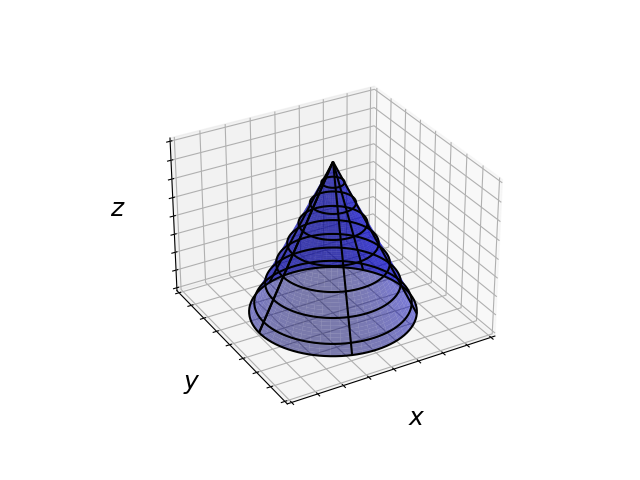

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(0,4)
    r = linspace(0,3/2,300)
    th = linspace(0,pi*2,100)

    r,th = meshgrid(r,th)
    ax.plot_surface(r*cos(th), r*sin(th), 4 - 8/3*r, color='b', alpha=.5)
    ax.plot_wireframe(r*cos(th), r*sin(th),4 - 8/3*r, rstride=20, cstride=40, color='k', alpha=1)

    ax.view_init(30, 60)
    ax.set_xlabel("$x$", fontsize=18)
    ax.set_ylabel("$y$", fontsize=18)
    ax.set_zlabel("$z$", fontsize=18)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([]);

    return fig.canvas

a("A cone")

<p style="padding-bottom:40%;"> </p>

### Solution

$$M = \int_0^{2\pi} \int_0^R \int_0^{h - \frac{h}{R}r} \rho r \,dz\,dr\,d\theta =  \frac\rho3 \pi R^2 h$$

$$I = \int_0^{2\pi} \int_0^R \int_0^{h - \frac{h}{R}r} \rho r^3 \,dz\,dr\,d\theta = \frac{3}{10} M R^2$$

###
<p style="padding-bottom:40%;"> </p>

# Example

Find the centroid of a solid hemisphere of radius $R$.

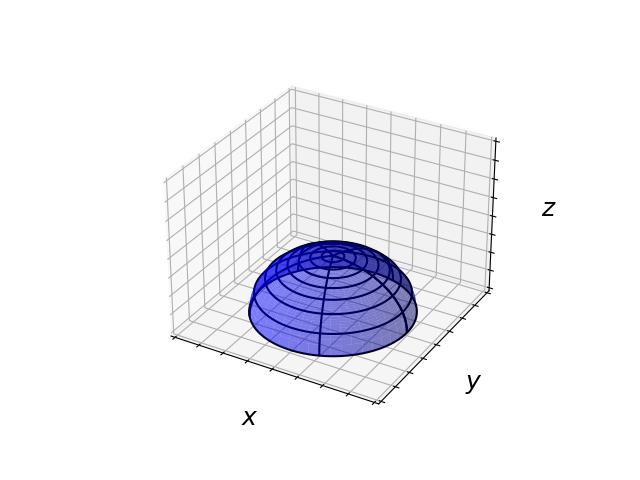

In [13]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(0,4)
    r = linspace(0,3/2,300)
    th = linspace(0,pi*2,100)

    r,th = meshgrid(r,th)
    ax.plot_surface(r*cos(th), r*sin(th), sqrt(9/4 - r**2), color='b', alpha=.5, zorder=1)

    ax.plot_wireframe(r*cos(th), r*sin(th), sqrt(9/4 - r**2), rstride=20, cstride=40, color='k', alpha=1,zorder=2)

    ax.view_init(30, -60)
    ax.set_xlabel("$x$", fontsize=18)
    ax.set_ylabel("$y$", fontsize=18)
    ax.set_zlabel("$z$", fontsize=18)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([]);

    return fig.canvas

a("A hemisphere")

<p style="padding-bottom:40%;"> </p>

### Solution

By symmetry, $\bar x = \bar y = 0$. The volume is $V = \frac23 \pi R^3$. 

$$ \bar z = \frac1V \iiint_E z\,dV = \frac{1}{2\pi/3 R^3 } \int_0^{2\pi} \int_0^{\pi/2} \int_0^R \rho \cos \phi \rho^2 \sin \phi \,d\rho\,d\phi\,d\theta $$

$$(\bar x,\bar y,\bar z) = (0,0,\frac38 R)$$